### Testing light curve utils module

<br>**Author(s):** Weixiang Yu
<br>**Last run:** 07-15-20
<br>**Short description:** The notebook hosts code to develope the `lc.utils` module 

In [1]:
# import basic packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import os, sys

# see if local stores mpl style, else use from src
try:
    plt.style.use('yu_basic')
except:
    mpl.rc_file('https://raw.githubusercontent.com/ywx649999311/project_template'
                '/master/%7B%7Bcookiecutter.project_name%7D%7D/src/vis/mpl/yu_basic.rc')

pd.set_option('display.max_columns', 999)
%matplotlib inline

In [2]:
# import kali
import kali.carma

### 1. Seasonal Gap function
A function for introducing seasonal gaps into light curves

In [3]:
# simulate DRW using Kali
drw_task = kali.carma.CARMATask(1,0)
theta = np.array([1/100, 0.1])
drw_task.set(1.0, theta)
drw_lc = drw_task.simulate(duration=365.25*5)

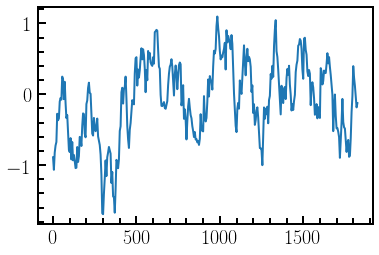

In [5]:
# plot original
plt.plot(drw_lc.t[::5], drw_lc.x[::5])

In [22]:
def add_season(t, y, lc_start=0, season_start=90, season_end=270):
    """Utility function to impose seasonal gap in mock light curves
    
    Args:
        t(array_like): Time stamp of observations in a light curve.
        y(array_like): Measured brightness of a source.
        lc_start(float): Light curve starting day within a year (0 -> 365.25). Default to 0.
        season_start(float): Observing season start day within a year. Default to 90.
        season_end(float): Observing season end day within a year. Default to 270.
    """
    
    t = t - t[0]
    t = t + lc_start
    
    mask = (np.mod(t, 365.25) > season_start ) & (np.mod(t, 365.25) < season_end)
    t_new = t[mask]
    y_new = y[mask]
    
    return t_new, y_new

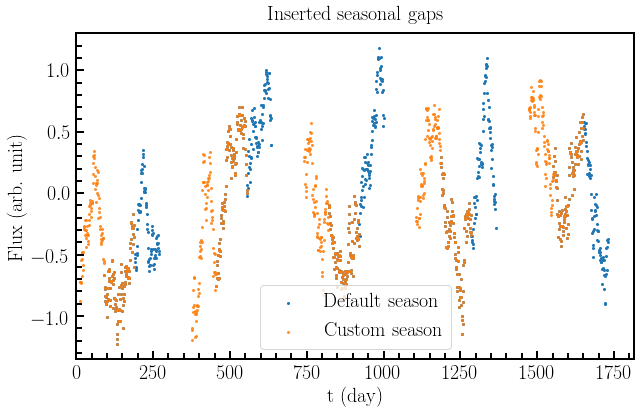

In [35]:
# plot lc with 6 month observing seasonal inserted
t_new, y_new = add_season(drw_lc.t, drw_lc.x)
t_new2, y_new2 = add_season(drw_lc.t, drw_lc.x, season_start=10, season_end=190)
fig = plt.figure(figsize=(10,6))
plt.scatter(t_new, y_new, s=4, label='Default season')
plt.scatter(t_new2, y_new2, s=4, label='Custom season', alpha=0.8)
plt.xlabel('t (day)')
plt.ylabel('Flux (arb. unit)')
plt.xlim(left=0)
plt.title('Inserted seasonal gaps')
plt.legend()

### 1.2 Add noise?

### 1.3 Downsampling given t